**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [71]:
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize
import itertools
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

We have created the ProductionEconomyClass which contains all equilibrium equations. We use check_market_clearing to check market clearing errors for different combinations of prices. To loop over the different combinations of prices we use product from itertools which does the same as a nested loop.

In [72]:
from Exam import ProductionEconomyClass

model = ProductionEconomyClass()

par = model.par

p_range = np.linspace(0.1, 2.0, 10)

eps_1 = []
eps_2 = []
eps_3 = []

# a. We calculate the deviations for all combinations of p1 and p2
for p1 in p_range:
    for p2 in p_range:
        eps1, eps2, eps3 = model.check_market_clearing(p1, p2)
        eps_1.append(eps1)
        eps_2.append(eps2)
        eps_3.append(eps3)

print("Errors in market clearing conditions:")
# b. Adjusted printing to account for all combinations
for i, (p1, p2) in enumerate(itertools.product(p_range, repeat=2)):
    print(f"p1 = {p1:7.4f}, p2 = {p2:7.4f}, ε1 = {eps_1[i]:7.4f}, ε2 = {eps_2[i]:7.4f}, ε3 = {eps_3[i]:7.4f}")

Errors in market clearing conditions:
p1 =  0.1000, p2 =  0.1000, ε1 = -0.9933, ε2 =  2.9600, ε3 =  6.9734
p1 =  0.1000, p2 =  0.3111, ε1 = -0.9645, ε2 =  3.0036, ε3 =  2.1347
p1 =  0.1000, p2 =  0.5222, ε1 = -0.9063, ε2 =  3.0930, ε3 =  1.1432
p1 =  0.1000, p2 =  0.7333, ε1 = -0.8194, ε2 =  3.2300, ε3 =  0.6770
p1 =  0.1000, p2 =  0.9444, ε1 = -0.7047, ε2 =  3.4171, ε3 =  0.3844
p1 =  0.1000, p2 =  1.1556, ε1 = -0.5632, ε2 =  3.6576, ε3 =  0.1709
p1 =  0.1000, p2 =  1.3667, ε1 = -0.3961, ε2 =  3.9548, ε3 =  0.0004
p1 =  0.1000, p2 =  1.5778, ε1 = -0.2044, ε2 =  4.3124, ε3 = -0.1437
p1 =  0.1000, p2 =  1.7889, ε1 =  0.0106, ε2 =  4.7334, ε3 = -0.2705
p1 =  0.1000, p2 =  2.0000, ε1 =  0.2481, ε2 =  5.2208, ε3 = -0.3851
p1 =  0.3111, p2 =  0.1000, ε1 = -0.9645, ε2 =  0.8260, ε3 =  7.0751
p1 =  0.3111, p2 =  0.3111, ε1 = -0.9357, ε2 =  0.8401, ε3 =  2.1676
p1 =  0.3111, p2 =  0.5222, ε1 = -0.8778, ε2 =  0.8690, ε3 =  1.1631
p1 =  0.3111, p2 =  0.7333, ε1 = -0.7912, ε2 =  0.9133, ε3 =  0.6

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

To find the equilibrium prices we create an objective function which is the market errors squared to avoid negative and positive error cancelling each other out. We use minimize to find the roots for p1 and p2.

In [73]:
# a. We find the equilibrium prices
p1_opt, p2_opt = model.find_market_equilibrium()
print(f"The equilibrium prices are p1: {p1_opt:.4f} and p2: {p2_opt:.4f}")


The equilibrium prices are p1: 0.9759 and p2: 1.4908


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

We define the SWF where we have rewritten the utility function with $T=\tau c_2^*$. We minimize the negative SWF to find the $\tau$ which gives the highest SWF. 

In [74]:
initial_tau = 0.0
bounds = [(0, 1)]

result = minimize(model.negative_swf, initial_tau, bounds=bounds, method='Nelder-Mead')

optimal_tau = result.x[0]
model.par.tau = optimal_tau
p1_opt, p2_opt = model.find_market_equilibrium()
optimal_swf = model.swf(p1_opt, p2_opt)

print(f"The optimal tau: {optimal_tau:.4f} where the prices are p1: {p1_opt:.4f} and p2: {p2_opt:.4f} and the social welfare is {optimal_swf:.4f}")

The optimal tau: 0.1715 where the prices are p1: 1.0138 and p2: 1.4653 and the social welfare is -0.6615


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


We import the parameters from CareerChoiceClass, and set up a simulation experiment. We loop over $v_j$ with $k=10.000$ draws to find the expected utility through LLN. 

We find that the first, second and third career path resectively gives expected utility 1, 2 and 3, corresponding to $v_1=1, v_2=2,v_3=3$. This makes sense since the mean of $\epsilon^k_{i,j}$ is $0$. 

In [75]:
from Exam import CareerChoiceClass

model2 = CareerChoiceClass()
par = model2.par

results = []


# a. Iterate over each v in v
for v in par.v:
    # I. Initialize an empty list to store the results of the current experiment
    experiment_results = []
    # II. Perform the experiment 10000 times for each v
    for _ in range(10000):
        # III. Generate epsilon from a normal distribution with mean 0 and standard deviation sigma
        epsilon = np.random.normal(0, par.sigma)
        # IV. Calculate u
        u = v + epsilon
        # V. Append the result to the experiment_results list
        experiment_results.append(u)
    # VI. Calculate the mean of the experiment_results list and append it to the results list
    results.append(np.mean(experiment_results))

print(", ".join([f"{result:.4f}" for result in results]))

0.9928, 1.9840, 2.9648


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

We set up another simulation. We simulate over each graduate for every career path to find the expected and realized utility. 

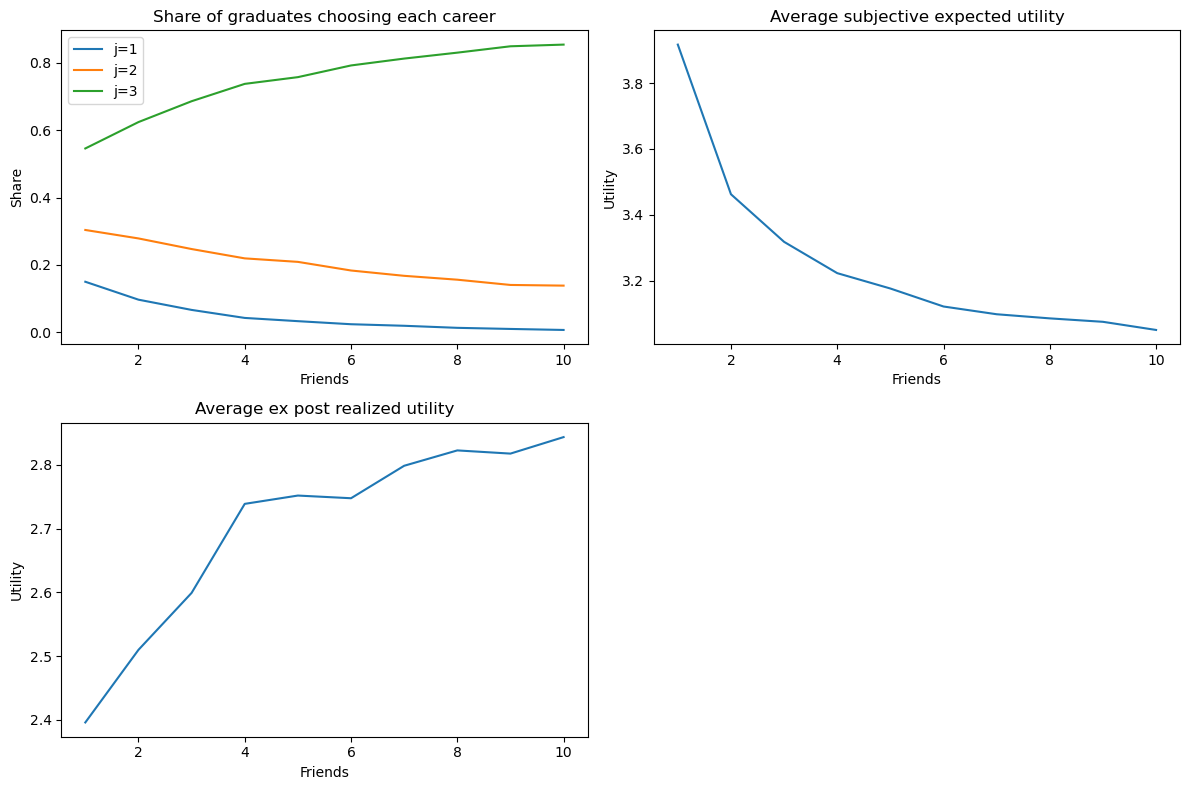

In [76]:
# a. We Initialize arrays to store the results
chosen_careers = np.zeros((par.N, par.K))
expected_utilities = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# b. For each graduate
for i in range(par.N):
    # I. For each simulation
    for k in range(par.K):
        # II. Calculate the expected utility of each career path
        expected_utilities_i = np.zeros(par.J)
        for j in range(par.J):
            epsilon_friends = np.random.normal(0, par.sigma, size=(i+1))
            expected_utilities_i[j] = np.mean(par.v[j] + epsilon_friends)
        # III. Choose the career path with the highest expected utility
        chosen_career = np.argmax(expected_utilities_i)
        chosen_careers[i, k] = chosen_career
        expected_utilities[i, k] = expected_utilities_i[chosen_career]
        # IV. Calculate the realized utility of the chosen career path
        epsilon_self = np.random.normal(0, par.sigma)
        realized_utilities[i, k] = par.v[chosen_career] + epsilon_self

# c. We calculate the share of graduates choosing each career
career_shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        career_shares[i, j] = np.mean(chosen_careers[i] == j)

# d. We Calculate the average subjective expected utility and the average ex post realized utility
average_expected_utilities = np.mean(expected_utilities, axis=1)
average_realized_utilities = np.mean(realized_utilities, axis=1)

# e. We plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, par.N+1), career_shares)
plt.title('Share of graduates choosing each career')
plt.xlabel('Friends')
plt.ylabel('Share')
plt.legend(['j=1', 'j=2', 'j=3'])

plt.subplot(2, 2, 2)
plt.plot(range(1, par.N+1), average_expected_utilities)
plt.title('Average subjective expected utility')
plt.xlabel('Friends')
plt.ylabel('Utility')

plt.subplot(2, 2, 3)
plt.plot(range(1, par.N+1), average_realized_utilities)
plt.title('Average ex post realized utility')
plt.xlabel('Friends')
plt.ylabel('Utility')

plt.tight_layout()
plt.show()

From the first graph we can see, that the graduates with many friends are more likely to choose the career path with the most utility, since they have the most information. From the second grapth we observe, that the average subjective expected utility declines with the number of friends. Lastly we see that the average ex post realized utility rises with the number of friends. This again makes sense since they choose the career path with more utility. 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

We create a new simulation similar to the last one, with the option of changing career paths. If the agent chooses to not change career the utility stays the same. If they however decide to switch, they will receive the utility from the new career minus the switching costs. 

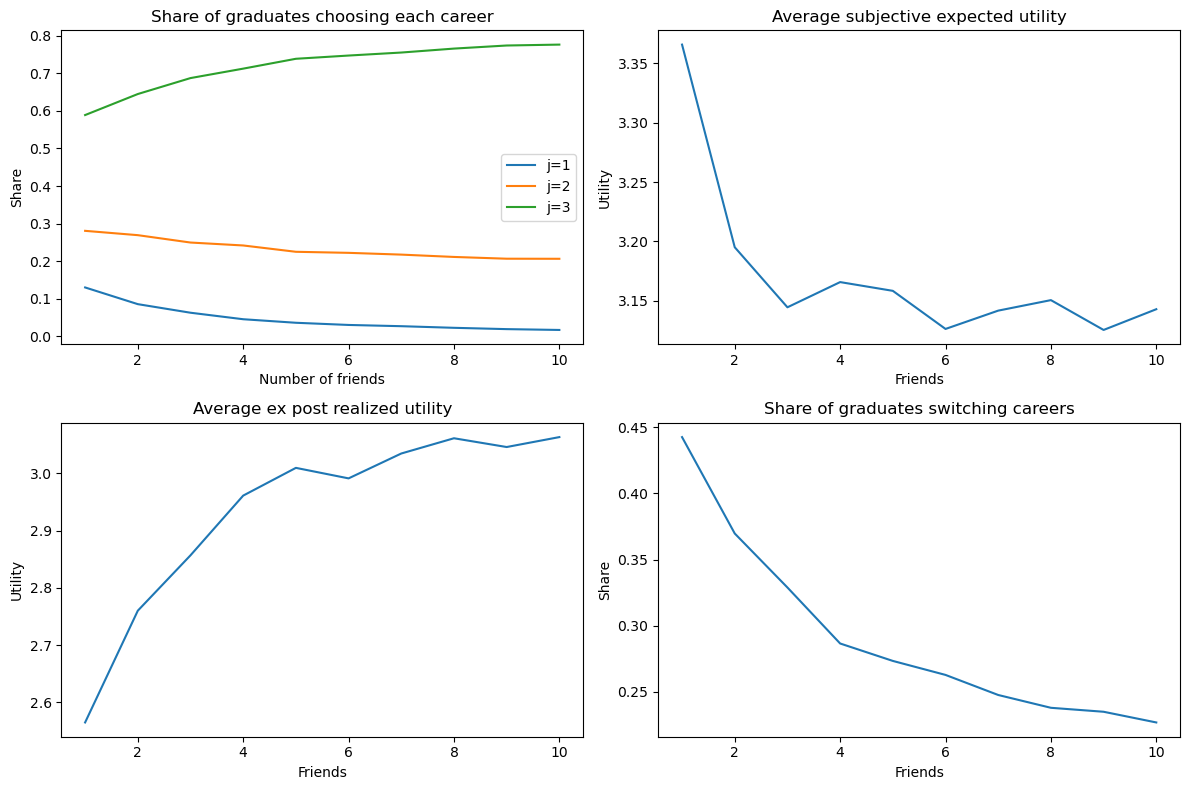

In [77]:
# a. We initialize arrays to store the results
new_chosen_careers = np.zeros((par.N, par.K))
new_expected_utilities = np.zeros((par.N, par.K))
new_realized_utilities = np.zeros((par.N, par.K))
switches = np.zeros((par.N, par.K))

# b. For each graduate
for i in range(par.N):
    # I. For each simulation
    for k in range(par.K):
        # II. Calculate the new priors for each career track
        new_priors = np.zeros(par.J)
        for j in range(par.J):
            if j == chosen_careers[i, k]:
                new_priors[j] = realized_utilities[i, k]
            else:
                epsilon_friends = np.random.normal(0, par.sigma, size=(i+1))
                new_priors[j] = np.mean(par.v[j] + epsilon_friends) - par.c
        # III. Choose the career track with the highest new prior
        new_chosen_career = np.argmax(new_priors)
        new_chosen_careers[i, k] = new_chosen_career
        new_expected_utilities[i, k] = new_priors[new_chosen_career]
        # IV. Calculate the realized utility of the new chosen career track
        if new_chosen_career == chosen_careers[i, k]:
            new_realized_utilities[i, k] = realized_utilities[i, k]
        else:
            epsilon_self = np.random.normal(0, par.sigma)
            new_realized_utilities[i, k] = par.v[new_chosen_career] + epsilon_self - par.c
        # V. Record whether the graduate chose to switch careers
        switches[i, k] = new_chosen_career != chosen_careers[i, k]

# c. We calculate the share of graduates choosing each career
new_career_shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        new_career_shares[i, j] = np.mean(new_chosen_careers[i] == j)

# d. We calculate the average subjective expected utility and the average ex post realized utility
new_average_expected_utilities = np.mean(new_expected_utilities, axis=1)
new_average_realized_utilities = np.mean(new_realized_utilities, axis=1)

# e. We calculate the share of graduates that chooses to switch careers
switch_shares = np.mean(switches, axis=1)

# f. We plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, par.N+1), new_career_shares)
plt.title('Share of graduates choosing each career')
plt.xlabel('Number of friends')
plt.ylabel('Share')
plt.legend(['j=1', 'j=2', 'j=3'])

plt.subplot(2, 2, 2)
plt.plot(range(1, par.N+1), new_average_expected_utilities)
plt.title('Average subjective expected utility')
plt.xlabel('Friends')
plt.ylabel('Utility')

plt.subplot(2, 2, 3)
plt.plot(range(1, par.N+1), new_average_realized_utilities)
plt.title('Average ex post realized utility')
plt.xlabel('Friends')
plt.ylabel('Utility')

plt.subplot(2, 2, 4)
plt.plot(range(1, par.N+1), switch_shares)
plt.title('Share of graduates switching careers')
plt.xlabel('Friends')
plt.ylabel('Share')

plt.tight_layout()
plt.show()

The first three graphs are similar to the last question, they are however generally at a higher level of utility. From the last graph it is clear that graduates with more friends tend to switch careers less often than graduates with less friends. This is due to the reason that agents with more friends have a higher change of choosing the career path with more utility. 

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [78]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

We calculate the points A,B,C and D, and we then find and plot the barycentric coordinates in a scatter plot. 

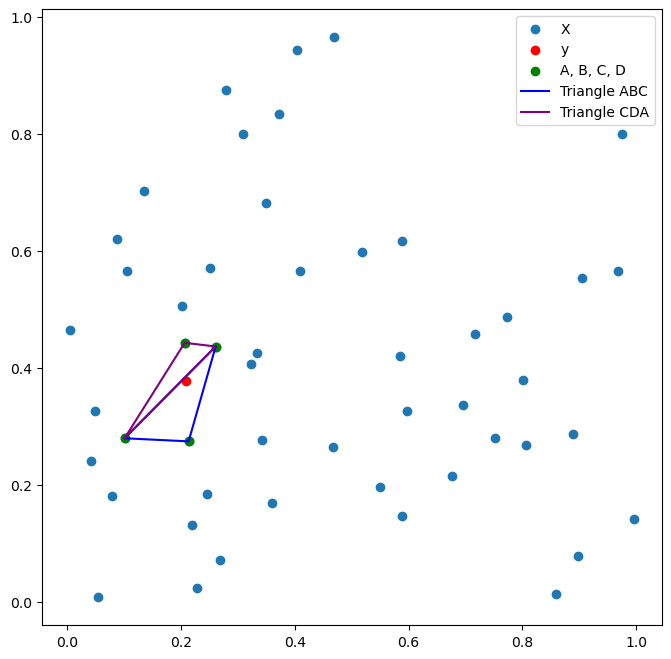

In [79]:
# a. We define a function to calculate the distance between two points
def distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# b. We initialize the points A, B, C, and D
A = B = C = D = None
min_dist_A = min_dist_B = min_dist_C = min_dist_D = np.inf

# c. We find the points A, B, C, and D
for x in X:
    dist = distance(x, y)
    if x[0] > y[0] and x[1] > y[1] and dist < min_dist_A:
        A = x
        min_dist_A = dist
    elif x[0] > y[0] and x[1] < y[1] and dist < min_dist_B:
        B = x
        min_dist_B = dist
    elif x[0] < y[0] and x[1] < y[1] and dist < min_dist_C:
        C = x
        min_dist_C = dist
    elif x[0] < y[0] and x[1] > y[1] and dist < min_dist_D:
        D = x
        min_dist_D = dist

# d. We plot the points and the triangles
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], label='X')
plt.scatter(y[0], y[1], color='red', label='y')
plt.scatter([A[0], B[0], C[0], D[0]], [A[1], B[1], C[1], D[1]], color='green', label='A, B, C, D')
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color='blue', label='Triangle ABC')
plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color='purple', label='Triangle CDA')
plt.legend()
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In this section we formally check the location of y. 

In [80]:
# a. We define a function to calculate the barycentric coordinates
def barycentric_coords(A, B, C, y):
    denom = ((B[1] - C[1])*(A[0] - C[0]) + (C[0] - B[0])*(A[1] - C[1]))
    r1 = ((B[1] - C[1])*(y[0] - C[0]) + (C[0] - B[0])*(y[1] - C[1])) / denom
    r2 = ((C[1] - A[1])*(y[0] - C[0]) + (A[0] - C[0])*(y[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

# b. We calculate the barycentric coordinates of y with respect to triangles ABC and CDA
r_ABC = barycentric_coords(A, B, C, y)
r_CDA = barycentric_coords(C, D, A, y)

# c. We check which triangle y is inside
inside_ABC = all(0 <= r <= 1 for r in r_ABC)
inside_CDA = all(0 <= r <= 1 for r in r_CDA)

if inside_ABC:
    print("y is inside triangle ABC")
elif inside_CDA:
    print("y is inside triangle CDA")
else:
    print("y is not inside either triangle")

y is inside triangle ABC


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [81]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

Since y is inside the triangle ABC, we now calculate the approximation of f at the point y. 

In [82]:
# a. We calculate the values of f at the points A, B, C, and D
f_A = f(A)
f_B = f(B)
f_C = f(C)
f_D = f(D)

# b. We calculate the true value of f at the point y
f_y_true = f(y)

# c. We calculate the approximation of f at the point y using the barycentric coordinates
if inside_ABC:
    f_y_approx = r_ABC[0]*f_A + r_ABC[1]*f_B + r_ABC[2]*f_C
elif inside_CDA:
    f_y_approx = r_CDA[0]*f_C + r_CDA[1]*f_D + r_CDA[2]*f_A
else:
    f_y_approx = np.nan

# d. We compare the true value and the approximation
print(f"True value of f(y): {f_y_true:.4f}")
print(f"Approximation of f(y): {f_y_approx:.4f}")

True value of f(y): 0.0790
Approximation of f(y): 0.0841


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [83]:
Y = [(0.2,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

We use the answers from questions 1-3 to create an algorithm, to calculate the approximation and true values of the coordinates from the vector Y. 

In [84]:
# a. We loop over each point in the vector
for y in Y:
    y = np.array(y)
    # I. Calculate the true value of f at the point y
    f_y_true = f(y)

    # II. Calculate the barycentric coordinates of y with respect to triangles ABC and CDA
    r_ABC = barycentric_coords(A, B, C, y)
    r_CDA = barycentric_coords(C, D, A, y)

    # III. Check which triangle y is inside
    inside_ABC = all(0 <= r <= 1 for r in r_ABC)
    inside_CDA = all(0 <= r <= 1 for r in r_CDA)

    # IV. Calculate the approximation of f at the point y using the barycentric coordinates
    if inside_ABC:
        f_y_approx = r_ABC[0]*f_A + r_ABC[1]*f_B + r_ABC[2]*f_C
    elif inside_CDA:
        f_y_approx = r_CDA[0]*f_C + r_CDA[1]*f_D + r_CDA[2]*f_A
    else:
        f_y_approx = np.nan

    # V. Compare the true value and the approximation
    print("For point", y)
    print("True value of f(y):", f_y_true)
    print("Approximation of f(y):", f_y_approx)

For point [0.2 0.2]
True value of f(y): 0.04000000000000001
Approximation of f(y): nan
For point [0.8 0.8]
True value of f(y): 0.6400000000000001
Approximation of f(y): nan
For point [0.8 0.2]
True value of f(y): 0.16000000000000003
Approximation of f(y): nan
For point [0.5 0.5]
True value of f(y): 0.25
Approximation of f(y): nan
